In [5]:
'''
PRACTICAL NO:02
A. Predict the price of the Uber ride from a given pickup point to the agreed drop-off
location. Perform following tasks: 
1. Pre-process the dataset.
2. Identify outliers. 
3. Check the correlation. 
4. Implement linear regression and ridge, Lasso regression models. 
5. Evaluate the models and compare their respective scores like R2, RMSE, etc. '''

'\nPRACTICAL NO:02\nA. Predict the price of the Uber ride from a given pickup point to the agreed drop-off\nlocation. Perform following tasks: \n1. Pre-process the dataset.\n2. Identify outliers. \n3. Check the correlation. \n4. Implement linear regression and ridge, Lasso regression models. \n5. Evaluate the models and compare their respective scores like R2, RMSE, etc. '

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import math
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler

In [7]:
data=pd.read_csv('uber.csv')

In [8]:
data.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [9]:
data.tail()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
199995,42598914,2012-10-28 10:49:00.00000053,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1
199996,16382965,2014-03-14 01:09:00.0000008,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1
199997,27804658,2009-06-29 00:42:00.00000078,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2
199998,20259894,2015-05-20 14:56:25.0000004,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1
199999,11951496,2010-05-15 04:08:00.00000076,14.1,2010-05-15 04:08:00 UTC,-73.984395,40.720077,-73.985508,40.768793,1


In [10]:
data.dtypes

Unnamed: 0             int64
key                   object
fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

In [11]:
data.shape

(200000, 9)

In [12]:
data.describe()

,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,2.000000e+05,200000.000000,200000.000000,200000.000000,199999.000000,199999.000000,200000.000000
mean,2.771250e+07,11.359955,-72.527638,39.935885,-72.525292,39.923890,1.684535
std,1.601382e+07,9.901776,11.437787,7.720539,13.117408,6.794829,1.385997
min,1.000000e+00,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,1.382535e+07,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000
50%,2.774550e+07,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,4.155530e+07,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000
max,5.542357e+07,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


In [14]:
data=data.drop(['Unnamed: 0','key','pickup_datetime'],axis=1)

In [15]:
data.isnull().sum()

fare_amount          0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [16]:
data=data.dropna()

In [17]:
data.isnull().sum()

fare_amount          0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 199999 entries, 0 to 199999
Data columns (total 6 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   fare_amount        199999 non-null  float64
 1   pickup_longitude   199999 non-null  float64
 2   pickup_latitude    199999 non-null  float64
 3   dropoff_longitude  199999 non-null  float64
 4   dropoff_latitude   199999 non-null  float64
 5   passenger_count    199999 non-null  int64  
dtypes: float64(5), int64(1)
memory usage: 10.7 MB


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 199999 entries, 0 to 199999
Data columns (total 6 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   fare_amount        199999 non-null  float64
 1   pickup_longitude   199999 non-null  float64
 2   pickup_latitude    199999 non-null  float64
 3   dropoff_longitude  199999 non-null  float64
 4   dropoff_latitude   199999 non-null  float64
 5   passenger_count    199999 non-null  int64  
dtypes: float64(5), int64(1)
memory usage: 10.7 MB


['fare_amount', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'passenger_count']


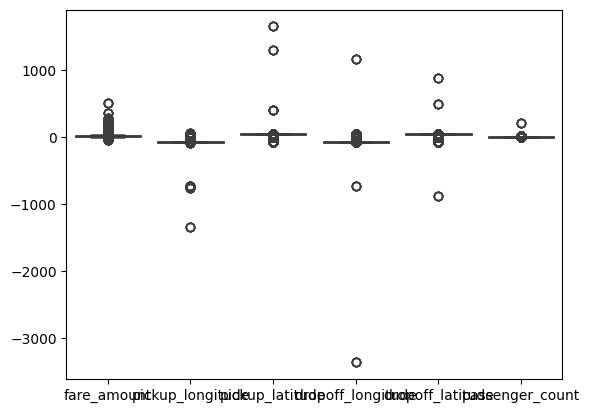

In [20]:
numeric_cols = data.select_dtypes(include=['int', 'float']).columns.tolist()
print(numeric_cols)
for col in numeric_cols:
        sns.boxplot(data[numeric_cols])

In [21]:
X = data.drop('fare_amount', axis=1)
y = data['fare_amount']

In [22]:
Q1 = X.quantile(0.25)
Q3 = X.quantile(0.75)
IQR = Q3 - Q1
outliers = ((X < (Q1 - 1.5 * IQR)) | (X > (Q3 + 1.5 * IQR))).any(axis=1)
X = X[~outliers]
y = y[~outliers]


In [23]:
correlation_matrix = data.corr()
for col in data.columns:
        
    print(correlation_matrix[col])
    print()

fare_amount          1.000000
pickup_longitude     0.010458
pickup_latitude     -0.008482
dropoff_longitude    0.008986
dropoff_latitude    -0.011014
passenger_count      0.010158
Name: fare_amount, dtype: float64

fare_amount          0.010458
pickup_longitude     1.000000
pickup_latitude     -0.816461
dropoff_longitude    0.833026
dropoff_latitude    -0.846324
passenger_count     -0.000415
Name: pickup_longitude, dtype: float64

fare_amount         -0.008482
pickup_longitude    -0.816461
pickup_latitude      1.000000
dropoff_longitude   -0.774787
dropoff_latitude     0.702367
passenger_count     -0.001559
Name: pickup_latitude, dtype: float64

fare_amount          0.008986
pickup_longitude     0.833026
pickup_latitude     -0.774787
dropoff_longitude    1.000000
dropoff_latitude    -0.917010
passenger_count      0.000033
Name: dropoff_longitude, dtype: float64

fare_amount         -0.011014
pickup_longitude    -0.846324
pickup_latitude      0.702367
dropoff_longitude   -0.917010
dropo

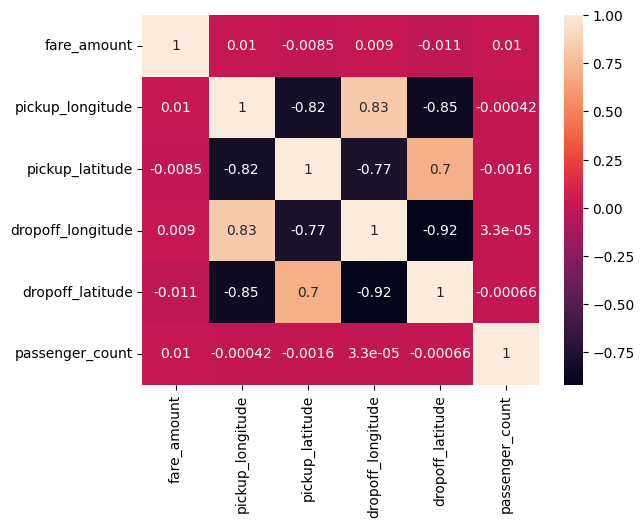

In [24]:
dataplot=sns.heatmap(data.corr(),annot=True)
plt.show()

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [27]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [28]:
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [29]:
ridge_reg = Ridge(alpha=1.0) 
ridge_reg.fit(X_train, y_train)

,alpha,1.0
,fit_intercept,True
,copy_X,True
,max_iter,None
,tol,0.0001
,solver,'auto'
,positive,False
,random_state,None


In [30]:
lasso_reg = Lasso(alpha=1.0) 
lasso_reg.fit(X_train, y_train)

,alpha,1.0
,fit_intercept,True
,precompute,False
,copy_X,True
,max_iter,1000
,tol,0.0001
,warm_start,False
,positive,False
,random_state,None
,selection,'cyclic'


In [31]:
y_pred_linear = linear_reg.predict(X_test)
y_pred_ridge = ridge_reg.predict(X_test)
y_pred_lasso = lasso_reg.predict(X_test)

In [32]:
r2_linear = r2_score(y_test, y_pred_linear)
rmse_linear = np.sqrt(mean_squared_error(y_test, y_pred_linear))
mae_linear = mean_absolute_error(y_test, y_pred_linear)

r2_ridge = r2_score(y_test, y_pred_ridge)
rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred_ridge))
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)

r2_lasso = r2_score(y_test, y_pred_lasso)
rmse_lasso = np.sqrt(mean_squared_error(y_test, y_pred_lasso))
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)

In [33]:
print("Linear Regression - R2:", round(r2_linear,2), "RMSE:", round(rmse_linear), "MAE:", round(mae_linear))
print("Ridge Regression - R2:", round(r2_ridge), "RMSE:", round(rmse_ridge), "MAE:", round(mae_ridge))
print("Lasso Regression - R2:", round(r2_lasso), "RMSE:", round(rmse_lasso), "MAE:", round(mae_lasso))

Linear Regression - R2: 0.02 RMSE: 5 MAE: 3
Ridge Regression - R2: 0 RMSE: 5 MAE: 3
Lasso Regression - R2: 0 RMSE: 5 MAE: 3


In [34]:
#prediction of price 
#heatmap

In [35]:
import math
print(abs(linear_reg.predict([[73.987042,40.739367,-73.986525,40.740297,1]])[0]))
print(abs(ridge_reg.predict([[73.987042,40.739367,-73.986525,40.740297,1]])[0]))
print(abs(lasso_reg.predict([[73.987042,40.739367,-73.986525,40.740297,1]])[0]))

85.4710876646248
85.46891283895306
9.088837443709256
